In [23]:
import pandas as pd


# load IMDB is an online database of movies that records user ratings of movies based on their likings
data = pd.read_csv('D1.csv')
# info and the first 10 transactions
print(data.info())
print(data.head(10))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   userId     8000 non-null   int64  
 1   movieId    7958 non-null   float64
 2   rating     8000 non-null   float64
 3   timestamp  8000 non-null   object 
 4   imdbId     7759 non-null   object 
 5   title      8000 non-null   object 
dtypes: float64(2), int64(1), object(3)
memory usage: 375.1+ KB
None
   userId  movieId  rating         timestamp     imdbId  \
0     227   2321.0     1.0   8/12/1998 16:23  tt0120789   
1     213  56949.0     2.0   7/05/2016 16:27  tt0988595   
2     272  95510.0     5.0  23/01/2016 22:22  tt0948470   
3     475  99813.0     4.0  11/11/2015 15:31  tt2166834   
4     203   1748.0     4.5  10/11/2008 12:53  tt0118929   
5     624   3258.0     3.0  18/04/2002 11:18  tt0104070   
6     594    913.0     5.0   3/10/1999 14:31  tt0033870   
7     580   2502.0     4.5   15/0

There are 8000 observations, each presenting a user's rating for a film. So, the dataset has some missing values in the field of movieId (42 records - NaN) and imdbId (241 records - NaN).

There are 6 variables in the
data set:
1userIDNTUnique identifier of the user- int64 -rnominalal
movieIDICUnique identifier of the movie - float64 -ce, nominalratingISRating given by the user to the movie- float64 - ordinal
4. timestamp: inal

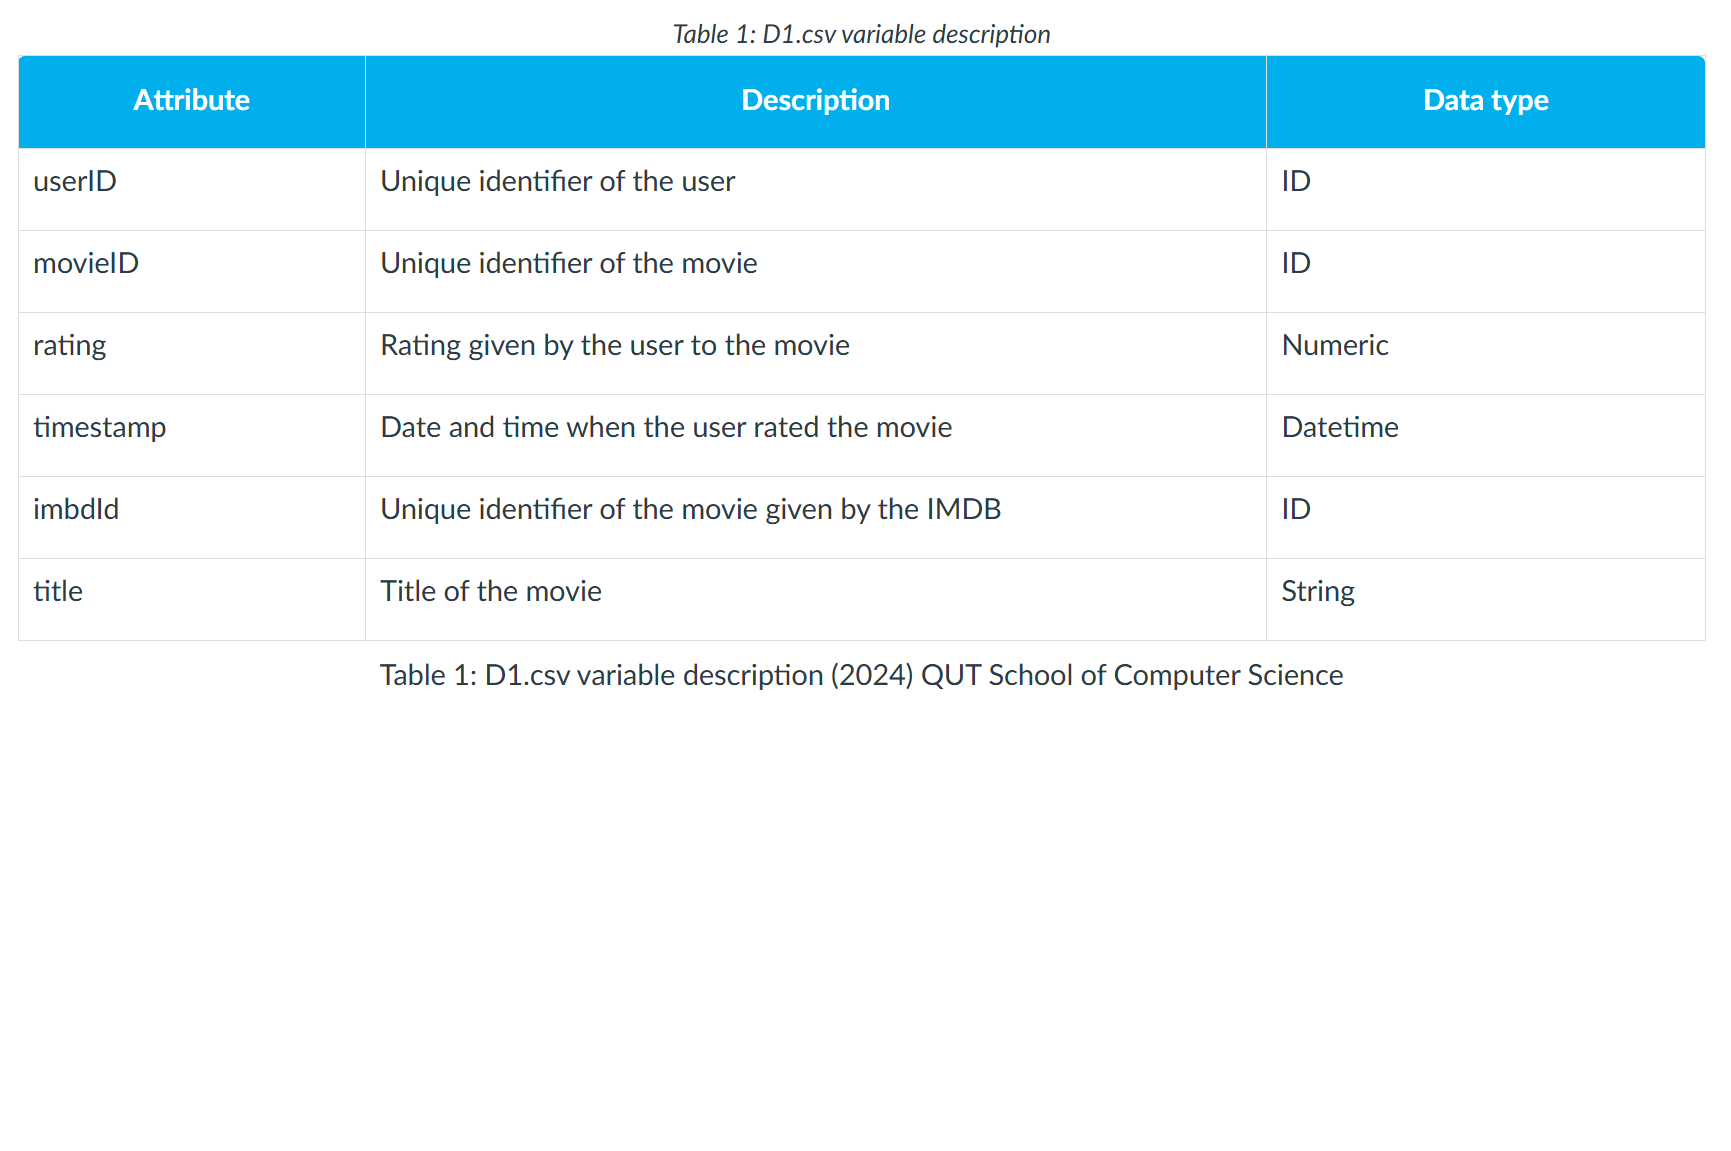

In [24]:
print(data)

      userId  movieId  rating         timestamp     imdbId  \
0        227   2321.0     1.0   8/12/1998 16:23  tt0120789   
1        213  56949.0     2.0   7/05/2016 16:27  tt0988595   
2        272  95510.0     5.0  23/01/2016 22:22  tt0948470   
3        475  99813.0     4.0  11/11/2015 15:31  tt2166834   
4        203   1748.0     4.5  10/11/2008 12:53  tt0118929   
...      ...      ...     ...               ...        ...   
7995     547  32371.0     4.0  28/09/2007 23:34  tt0040202   
7996     212     44.0     2.0  13/12/2009 11:51  tt0113855   
7997     254    608.0     5.0  12/10/1996 21:58  tt0116282   
7998     176   7143.0     4.5  26/06/2012 12:55  tt0325710   
7999     346   2527.0     2.0   7/02/2003 20:46  tt0070909   

                                        title  
0                               Pleasantville  
1                                  27 Dresses  
2                      The Amazing Spider-Man  
3     Batman: The Dark Knight Returns, Part 2  
4              

In [25]:
data['userId'].value_counts()

userId
547    192
564    143
624    126
15     122
73     119
      ... 
107      1
276      1
55       1
171      1
372      1
Name: count, Length: 646, dtype: int64

Note that there is more than one row for each `userId` because the rows are about `movieId` (i.e. every time an imdb user watches a different movie they have a new row in this table.)

In [26]:
data['movieId'].value_counts()

movieId
296.0       33
356.0       28
1270.0      25
457.0       25
260.0       24
            ..
127114.0     1
4587.0       1
3008.0       1
1955.0       1
2527.0       1
Name: count, Length: 2932, dtype: int64

This field probably needs to be set as an integer type. There is more than one row with the same `movieID`, just assigned to a different `userId`.

In [27]:
data['rating'].value_counts()

rating
4.0    2263
3.0    1698
5.0    1167
3.5     798
4.5     624
2.0     578
2.5     347
1.0     290
1.5     135
0.5     100
Name: count, dtype: int64

This looks great. Wonder why `dtype` in `info()` is mentioned as `float64`, which makes sense, and when using `value_counts()` the `dtype` is `int64`. No nulls in column, it seems.

In [28]:
data['timestamp'].value_counts()

timestamp
7/05/2016 18:01     20
14/04/1996 8:48      8
14/04/1996 14:31     7
23/07/2016 12:54     7
24/04/2008 12:27     5
                    ..
13/03/2009 21:39     1
10/12/2008 14:41     1
9/03/2000 6:24       1
14/10/2009 8:19      1
7/02/2003 20:46      1
Name: count, Length: 6739, dtype: int64

This field should change to `datetime64` or `int64` type (days from min day).

In [29]:
data['imdbId'].value_counts()

imdbId
tt0110912    31
tt0106977    25
tt0109830    24
tt0088763    24
tt0080684    23
             ..
tt0479468     1
tt1601913     1
tt1307873     1
tt1157705     1
tt0070909     1
Name: count, Length: 2892, dtype: int64

This should be a string. Should be easy enough to populate based on the rest of the data.

In [30]:
data['title'].value_counts()

title
Pulp Fiction                                    33
Forrest Gump                                    28
The Fugitive                                    25
Back to the Future                              25
The Empire Strikes Back                         24
                                                ..
White Lightning                                  1
Texas Chainsaw Massacre: The Next Generation     1
The Blob                                         1
Maya Lin: A Strong Clear Vision                  1
Westworld                                        1
Name: count, Length: 2911, dtype: int64

In [31]:
data['title'].nunique()

2911

`title` should be cast to string.

In [32]:
print(data.nunique())

userId        646
movieId      2932
rating         10
timestamp    6739
imdbId       2892
title        2911
dtype: int64


There is a total of 646 users and 2943 unique movies in this subset of data. Therefore, 11 unique movie Id are missing.

In [33]:
print(data.shape)

(8000, 6)


In [34]:

# Step 1: Create mappings
title_to_imdbId = data.dropna(subset=['imdbId']).drop_duplicates('title').set_index('title')['imdbId'].to_dict()
title_to_movieId = data.dropna(subset=['movieId']).drop_duplicates('title').set_index('title')['movieId'].to_dict()

# Step 2: Fill missing values
data['imdbId'] = data.apply(lambda row: title_to_imdbId.get(row['title']) if pd.isna(row['imdbId']) else row['imdbId'], axis=1)
data['movieId'] = data.apply(lambda row: title_to_movieId.get(row['title']) if pd.isna(row['movieId']) else row['movieId'], axis=1)
#data['imdbId'] = data.apply(lambda row: title_to_movieId.get(row['title'], row['imdbId']), axis=1)
#data['movieId'] = data.apply(lambda row: title_to_movieId.get(row['title'], row['movieId']), axis=1)

print(data.info())

# Step 3: Verify if all missing values are filled
print(data.isnull().sum())  # Should show remaining missing values (if any)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   userId     8000 non-null   int64  
 1   movieId    7988 non-null   float64
 2   rating     8000 non-null   float64
 3   timestamp  8000 non-null   object 
 4   imdbId     7947 non-null   object 
 5   title      8000 non-null   object 
dtypes: float64(2), int64(1), object(3)
memory usage: 375.1+ KB
None
userId        0
movieId      12
rating        0
timestamp     0
imdbId       53
title         0
dtype: int64


In [35]:
rows_with_null_imdbId = data[data['imdbId'].isnull()]


rows_with_null_imdbId_filled = data[data['imdbId'].isnull()]

rows_with_null_imdbId_filled

,userId,movieId,rating,timestamp,imdbId,title
844,628,3363.0,4.0,9/01/2013 9:52,None,American Graffiti
847,609,4865.0,5.0,20/08/2002 18:51,None,From Hell
852,475,111743.0,1.5,11/11/2015 15:34,None,A Million Ways to Die in the West
861,287,102125.0,4.5,22/07/2016 4:34,None,Iron Man 3
867,15,122924.0,2.5,13/06/2016 4:53,None,X-Men: Apocalypse
868,426,72489.0,2.5,27/08/2011 16:01,None,Ninja Assassin
873,439,5500.0,3.0,28/12/2002 22:42,None,Top Secret!
879,262,96815.0,3.0,22/06/2016 0:26,None,V/H/S
881,547,7009.0,3.0,16/12/2003 17:33,None,Lorenzo's Oil
895,547,6367.0,2.5,30/12/2005 18:13,None,Down with Love


In [36]:
rows_with_null_movieId = data[data['movieId'].isnull()]

rows_with_null_movieId_filled = data[data['movieId'].isnull()]

rows_with_null_movieId_filled

,userId,movieId,rating,timestamp,imdbId,title
702,452,NaN,3.0,10/12/2000 5:29,tt0108265,Swing Kids
704,150,NaN,3.0,20/02/2006 8:38,tt0115857,Chain Reaction
707,505,NaN,3.0,15/07/2012 0:26,tt0077362,Coming Home
710,547,NaN,3.5,17/05/2003 11:42,tt0079239,The Great Santini
714,311,NaN,3.5,26/08/2003 19:54,tt0062362,Thoroughly Modern Millie
716,195,NaN,3.0,25/12/2000 14:46,tt0079239,The Great Santini
2452,529,NaN,4.5,5/08/2005 19:57,tt0033836,The Little Foxes
2454,56,NaN,4.0,27/06/2016 6:14,tt0092718,Can't Buy Me Love
2455,468,NaN,3.0,28/01/2011 7:30,tt0050558,The James Dean Story
2456,417,NaN,4.0,4/04/2005 3:38,tt0118111,Waiting for Guffman


The `title`, `movieId` and `imdbId` all convey similar information. Recommend dropping both of the latter and using `title` to identify movies watched by each user.

If each user's set of watched films is a transaction then we will need to aggregate `title` by `userId`. (Later on, using `timestamp` to order each list will be useful for sequential mining.)

In [37]:
print(data.nunique())

userId        646
movieId      2932
rating         10
timestamp    6739
imdbId       2892
title        2911
dtype: int64


How can to match data and make unique 2943 movies?? 2932 same as before. Something wrong????

In [38]:
# group by userId, then list all movies because Apriori requires a set of transactions.
transactions = data.groupby(['userId'])['title'].apply(list)
print(transactions.head(5))

userId
2    [Interview with the Vampire, Ed Wood, Disclosu...
3    [The White Stripes: Under Great White Northern...
4    [Addams Family Values, Mystery Men, The Fly, F...
5    [Road to Perdition, Almost Famous, Miss Congen...
6                          [Judge Dredd, Spider-Man 2]
Name: title, dtype: object


In [39]:
aggregated_titles_title_and_userid = data.groupby('userId')['title'].apply(lambda x: ', '.join(x)).reset_index()
aggregated_titles_userid = data.groupby('userId')['title'].apply(list)

In [40]:
print(aggregated_titles_title_and_userid.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 646 entries, 0 to 645
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   userId  646 non-null    int64 
 1   title   646 non-null    object
dtypes: int64(1), object(1)
memory usage: 10.2+ KB
None


In [41]:
print(aggregated_titles_userid.info())

<class 'pandas.core.series.Series'>
Index: 646 entries, 2 to 671
Series name: title
Non-Null Count  Dtype 
--------------  ----- 
646 non-null    object
dtypes: object(1)
memory usage: 10.1+ KB
None


In [42]:
print(aggregated_titles_userid)

userId
2      [Interview with the Vampire, Ed Wood, Disclosu...
3      [The White Stripes: Under Great White Northern...
4      [Addams Family Values, Mystery Men, The Fly, F...
5      [Road to Perdition, Almost Famous, Miss Congen...
6                            [Judge Dredd, Spider-Man 2]
                             ...                        
667    [Pulp Fiction, The American President, Apollo ...
668                                          [Punchline]
669             [Me, Myself & Irene, Return of the Jedi]
670                       [Se7en, Contact, The Fugitive]
671    [Dolores Claiborne, Amadeus, The Wizard of Oz,...
Name: title, Length: 646, dtype: object


In [43]:
from apyori import apriori

# type cast the transactions from pandas into normal list format and run apriori
transaction_list = list(transactions)
## min_support=0.05
results_005 = list(apriori(transaction_list, min_support=0.05))
# print first 5 rules
print(results_005[:5])

[RelationRecord(items=frozenset({'Pulp Fiction'}), support=0.05108359133126935, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({'Pulp Fiction'}), confidence=0.05108359133126935, lift=1.0)])]


In [55]:
def convert_apriori_results_to_pandas_df(results_005):
    rules = []
    for rule_set in results_005:
        for rule in rule_set.ordered_statistics:
        # items_base = left side of rules, items_add = right side
        # support, confidence and lift for respective rules
            rules.append([','.join(rule.items_base), ','.join(rule.items_add), rule_set.support, rule.confidence, rule.lift])
            
    # typecast it to pandas df
    return pd.DataFrame(rules, columns=['Left_side', 'Right_side', 'Support', 'Confidence','Lift'])
result_df = convert_apriori_results_to_pandas_df(results_005)
print(result_df.head(20))

  Left_side    Right_side   Support  Confidence  Lift
0            Pulp Fiction  0.051084    0.051084   1.0


In [ ]:
## min_support = 0.01
results_001 = list(apriori(transaction_list, min_support=0.01))

results_001[:5]

In [ ]:
result_d1_001 = convert_apriori_results_to_pandas_df(results_001)

result_d1_001 = result_d1_001.sort_values(by='Lift', ascending=False)

result_d1_001 = result_d1_001.sort_values(by='Left_side', ascending=False)

result_d1_001 = result_d1_001.sort_values(by='Support', ascending=False)

result_d1_001 = result_d1_001.sort_values(by='Confidence', ascending=False)

result_d1_001

In [ ]:
pd.set_option('display.max_rows', None)

In [ ]:
print(result_d1_001)

seems like each movie watched is independent of each other

In [ ]:
## min_support = 0.005
results_0005 = list(apriori(transaction_list, min_support=0.005))

results_0005[:5]

In [ ]:
result_d1_0005 = convert_apriori_results_to_pandas_df(results_0005)

result_d1_0005 = result_d1_0005.sort_values(by=['Lift','Confidence'], ascending=False)

result_d1_0005[:30]

I note that I had to set minimum support quite low to see movies with associations between them instead of independence.

A support of 0.005 means that each rule is built on a minimum of 0.5% of transactions in the set (about 32 transactions). With a range of 2911 distinct movies that users have watched in this data set, we have a lot of unique results. Limiting transactions to the most common movies might yield results with higher support.

Let's look at the top five rules with highest lift and highest confidence.

['Rebel Without A Cause'] -> ['Rear Window']

support: 0.006192

The rule only applies to ~4/646 transactions.

confidence: 0.444444

44% of transactions that show the user having watched 'Rebel Without A Cause' also show the user having watched 'Rear Window' The opposite relationship (['Rear Window'] -> ['Rebel Without A Cause']) is also in the list, but with lower confidence.

lift: 28.711111

Lift is quite high - having 'Rebel Without A Cause' in one's watchlist increases the likelihood of also seeing 'Rear Window' in their list by nearly 29x

Having low support though means that the movies themselves are relatively uncommon in the dataset and use of the rules going forward may be sparse. It also means that there isn't a lot of evidence to support the existence of the rule.

I also note that these movies are from a similar time period ('Rear Window' from 1954 and 'Rebel Without A Cause' from 1955) - it makes some sense that if a user is interested in one, they might have watched the other. However, the movies are in quite different genres.

['The Mummy'] -> ['Ace Ventura: Pet Detective']

support: 0.006192

The rule only applies to ~4/646 transactions.

confidence: 0.500000

50% of transactions that show the user having watched 'The Mummy' also show the user having watched 'Ace Ventura: Pet Detective'
The opposite relationship (['Ace Ventura: Pet Detective'] -> ['The Mummy']) is also in the list, but with lower confidence - not even half the level of confidence of the former.

lift: 19.000000

Lift is quite high - having 'The Mummy' in one's watchlist increases the likelihood of also seeing 'Ace Ventura: Pet Detective' in their list.

Having low support though means that the movies themselves are relatively uncommon in the dataset and use of the rules going forward may be sparse. It also means that there isn't a lot of evidence to support the existence of the rule.

I also note that these movies are from a similar time period ('The Mummy' from 1999 and 'Ace Ventura: Pet Detective' from 1995), although they are in slightly different genres.

['Lock, Stock and Two Smoking Barrels'] -> ['Back to the Future']

support: 0.006192

The rule only applies to ~4/646 transactions.

confidence: 0.571429

57% of transactions that show the user having watched 'Lock, Stock and Two Smoking Barrels' also show the user having watched 'Back to the Future'. The opposite relationship (['Back to the Future'] -> ['Lock, Stock and Two Smoking Barrels']) is also in the list, but with lower confidence (16%) - not even half the level of confidence of the former.

lift: 19.000000

Lift is quite high - having 'Lock, Stock and Two Smoking Barrels' in one's watchlist increases the likelihood of also seeing 'Back to the Future' in their list by 19x.

Having low support though means that the movies themselves are relatively uncommon in the dataset and use of the rules going forward may be sparse. It also means that there isn't a lot of evidence to support the existence of the rule.

These movies don't have a lot in common, besides that they are both popular, acclaimed movies for their time and might be on a 'greatest of' list somewhere together.

['Mission: Impossible II'] -> ['Twelve Monkeys']

support: 0.006192

The rule only applies to ~4/646 transactions.

confidence: 0.333333 ['Mission: Impossible II'] -> ['Twelve Monkeys']

support: 0.006192

The rule only applies to ~4/646 transactions.

confidence: 0.333333

33% of transactions that show the user having watched 'Mission: Impossible II' also show the user having watched 'Twelve Monkeys'. The opposite relationship (['Mission: Impossible II'] -> ['Twelve Monkeys']) is also in the list, but with lower confidence (26%). In general, this is pretty average.

lift: 14.355556

Lift is quite high - having 'Mission: Impossible II' in one's watchlist increases the likelihood of also seeing 'Twelve Monkeys' in their list by 14x.

Having low support though means that the movies themselves are relatively uncommon in the dataset and use of the rules going forward may be sparse. It also means that there isn't a lot of evidence to support the existence of the rule.

In terms of commonality, 'Mission: Impossible II' and 'Twelve Monkeys' are both movies with science-fiction, thriller themes. It makes sense that a user with a liking of these kind of movies might have watched both of these. 33% of transactions that show the user having watched 'Mission: Impossible II' also show the user having watched 'Twelve Monkeys'. The opposite relationship (['Twelve Monkeys'] -> ['Mission: Impossible II']) is also in the list, but with lower confidence (26%). In general, this is pretty average.

lift: 14.355556

Lift is quite high - having 'Mission: Impossible II' in one's watchlist increases the likelihood of also seeing 'Twelve Monkeys' in their list by 14x.

Having low support though means that the movies themselves are relatively uncommon in the dataset and use of the rules going forward may be sparse. It also means that there isn't a lot of evidence to support the existence of the rule.

In terms of commonality, 'Mission: Impossible II' and 'Twelve Monkeys' are both movies with science-fiction, thriller themes. It makes sense that a user with a liking of these kind of movies might have watched both of these.

['Rocky'] -> ['The Usual Suspects']

support: 0.006192

The rule only applies to ~4/646 transactions.

confidence: 0.444444

44% of transactions that show the user having watched 'Rocky' also show the user having watched 'The Usual Suspects'. The opposite relationship (['The Usual Suspects'] -> ['Rocky']) is also in the list, but with lower confidence (18%).

lift: 13.050505

Lift is quite high - having 'Rocky' in one's watchlist increases the likelihood of also seeing 'The Usual Suspects' in their list by 13x.

Having low support though means that the movies themselves are relatively uncommon in the dataset and use of the rules going forward may be sparse. It also means that there isn't a lot of evidence to support the existence of the rule.

'Rocky' and 'The Usual Suspects' are pretty different movies, although they are both popular and acclaimed.

In [47]:
# Filter rows where userId who watched "The Shawhank Redemption"
shawshank_users = data[data['title'] == 'The Shawshank Redemption']['userId'].unique()

# Step 2: Filter movies watched by these users
movies_by_shawshank_users = data[data['userId'].isin(shawshank_users)]

# Step 3: Exclude 'The Shawshank Redemption' from the count
other_movies = movies_by_shawshank_users[movies_by_shawshank_users['title'] != 'The Shawshank Redemption']

# Step 4: Count and rank the most watched movies
top5_watched_movies = other_movies['title'].value_counts()[:5]

# Display the filtered rows
print(top5_watched_movies)

title
Jurassic Park                                        4
The Client                                           3
The Godfather                                        3
The Lord of the Rings: The Fellowship of the Ring    3
Die Hard: With a Vengeance                           3
Name: count, dtype: int64


In [48]:
#convert column to timestamp dtype
data['timestamp'] = pd.to_datetime(data['timestamp'], format="%d/%m/%Y %H:%M", errors="coerce" )

# Sort by the 'timestamp' column
data_sorted = data.sort_values(by='timestamp')

## aggreggating by title
aggregated_titles_seq = data_sorted.groupby('userId')['title'].apply(list)

pd.set_option('display.max_colwidth', None)
pd.set_option('display.width', 1000)

In [49]:
aggregated_titles_seq

userId
2                                                                                                                                         [Interview with the Vampire, Disclosure, Ed Wood, Four Weddings and a Funeral, The Naked Gun 33⅓: The Final Insult]
3                                                                                                                                                              [The Flintstones, Aladdin, The White Stripes: Under Great White Northern Lights, Spider-Man 2]
4      [National Lampoon's Loaded Weapon 1, Jurassic Park, Mystery Men, The Princess Bride, Fast Times at Ridgemont High, Sixteen Candles, GoodFellas, Wild Things, Lethal Weapon 3, The Neverending Story, The Addams Family, Addams Family Values, The Fly]
5                                                                           [Vertigo, Charlie and the Chocolate Factory, Almost Famous, The Breakfast Club, Road to Perdition, The Graduate, The Wedding Singer, Hotel Rwanda, Panic Ro

In [59]:
from collections import defaultdict
import subprocess
import re

sequences = aggregated_titles_seq.values.tolist()
# show the first 5 sequences
print(sequences[:5])

def get_association_rules(sequences, min_sup, min_conf):
    
    item_dict = defaultdict(int)
    output_dict = defaultdict(str)
    item_id = 1

    # write your sequences in SPMF format
    with open('seq_rule_input.txt', 'w+') as f:
        for sequence in sequences:
            z = []
            for itemset in sequence:
                # if there are multiple items in one itemset
                if isinstance(itemset, list):
                    for item in itemset:
                        if item not in item_dict:
                            item_dict[item] = item_id
                            item_id += 1

                        z.append(item_dict[item])
                else:
                    if itemset not in item_dict:
                        item_dict[itemset] = item_id
                        output_dict[str(item_id)] = itemset
                        item_id += 1
                    z.append(item_dict[itemset])
                    
                # end of itemset
                z.append(-1)
            
            # end of a sequence
            z.append(-2)
            f.write(' '.join([str(x) for x in z]))
            f.write('\n')

        # run SPMF with supplied parameters
    supp_param = '{}%'.format(int(min_sup * 100))
    conf_param = '{}%'.format(int(min_conf * 100))
    subprocess.call(['java', '-jar', 'spmf.jar', 'run', 'RuleGrowth', 'seq_rule_input.txt', 'seq_rule_output.txt', supp_param, conf_param], shell=True)

    outputs = open('seq_rule_output.txt', 'r').read().strip().split('\n')
    output_rules = []
    for rule in outputs:  # Assuming output_dict has a 'rules' key
        # Regular expression pattern
        match = re.search(r'([0-9,]+) ==> ([0-9,]+) #SUP: ([0-9]+) #CONF: ([0-9\.]+)', rule)
        
        if match:  # Only proceed if a match is found
            left, right, sup, conf = match.groups()
            sup = int(sup) / len(sequences) # Assuming you have a sequences list in your output_dict
            conf = float(conf)
            output_rules.append([[output_dict[x] for x in left.split(',')], [output_dict[x] for x in right.split(',')], sup, conf])
        else:
            print(f"Rule didn't match: {rule}")  # Optional, print rules that don't match the expected pattern
    
    return pd.DataFrame(output_rules, columns = ['Left_rule', 'Right_rule', 'Support', 'Confidence'])

[['Interview with the Vampire', 'Disclosure', 'Ed Wood', 'Four Weddings and a Funeral', 'The Naked Gun 33⅓: The Final Insult'], ['The Flintstones', 'Aladdin', 'The White Stripes: Under Great White Northern Lights', 'Spider-Man 2'], ["National Lampoon's Loaded Weapon 1", 'Jurassic Park', 'Mystery Men', 'The Princess Bride', 'Fast Times at Ridgemont High', 'Sixteen Candles', 'GoodFellas', 'Wild Things', 'Lethal Weapon 3', 'The Neverending Story', 'The Addams Family', 'Addams Family Values', 'The Fly'], ['Vertigo', 'Charlie and the Chocolate Factory', 'Almost Famous', 'The Breakfast Club', 'Road to Perdition', 'The Graduate', 'The Wedding Singer', 'Hotel Rwanda', 'Panic Room', 'Miss Congeniality'], ['Spider-Man 2', 'Judge Dredd']]


In [57]:
seq_rules = get_association_rules(sequences, 0.005, 0.005)

print(seq_rules.columns)

#seq_rules.sort_values(by=['Lift','Confidence'], ascending=False)



Index(['Left_rule', 'Right_rule', 'Support', 'Confidence'], dtype='object')
